In [4]:
%run setup.ipynb
%matplotlib inline
import hapclust

#### setup data

In [5]:
# obtain data from unphased callset - only needed for variant annotations
callset = phase1_ar31.callset
pos_all = allel.SortedIndex(callset['2L/variants/POS'])
ann_all = callset['2L/variants/ANN'][:][['Annotation', 'HGVS_p']]

# setup haplotype data
callset_phased = phase1_ar31.callset_phased
genotypes_phased = allel.GenotypeDaskArray(callset_phased['2L/calldata/genotype'])
pos_phased = allel.SortedIndex(callset_phased['2L/variants/POS'])
genotypes_phased.shape, pos_phased.shape

((8296600, 773, 2), (8296600,))

In [6]:
# define general region we're going to analyse
loc_region = pos_phased.locate_range(0, 4000000)
pos_phased_region = pos_phased[loc_region]

# chop genotypes to region, remove colony parents (8 samples) and turn into haplotype array
gen_phased_region = genotypes_phased[loc_region][:, :-8].compute()
haps = gen_phased_region.to_haplotypes()

#chop into gene
region_vgsc = SeqFeature('2L', 2358158, 2431617)
loc = pos_phased_region.locate_range(region_vgsc.start, region_vgsc.end)
h_vgsc = haps[loc]

h_vgsc

<HaplotypeArray shape=(1710, 1530) dtype=int8>
0 0 0 0 0 ... 0 0 0 0 0
0 0 0 0 0 ... 0 0 0 0 0
0 0 0 0 0 ... 0 0 0 0 0
...
0 0 0 0 0 ... 0 0 0 0 0
0 0 0 0 0 ... 0 0 0 0 0
0 0 0 0 0 ... 0 0 0 0 0

In [7]:
tbl_haplotypes = etl.fromtsv('../data/ag1000g.phase1.AR3.1.haplotypes.meta.txt')
hap_pops = np.array(tbl_haplotypes.values('population'))[ :-16]
# need to use named colors for graphviz
pop_colors = {
    'AOM': 'brown',
    'BFM': 'firebrick1',
    'GWA': 'goldenrod1',
    'GNS': 'cadetblue1',
    'BFS': 'deepskyblue',
    'CMS': 'dodgerblue3',
    'UGS': 'palegreen',
    'GAS': 'olivedrab',
    'KES': 'grey47',
    'colony': 'black'
}
hap_colors = np.array([pop_colors[p] for p in hap_pops])

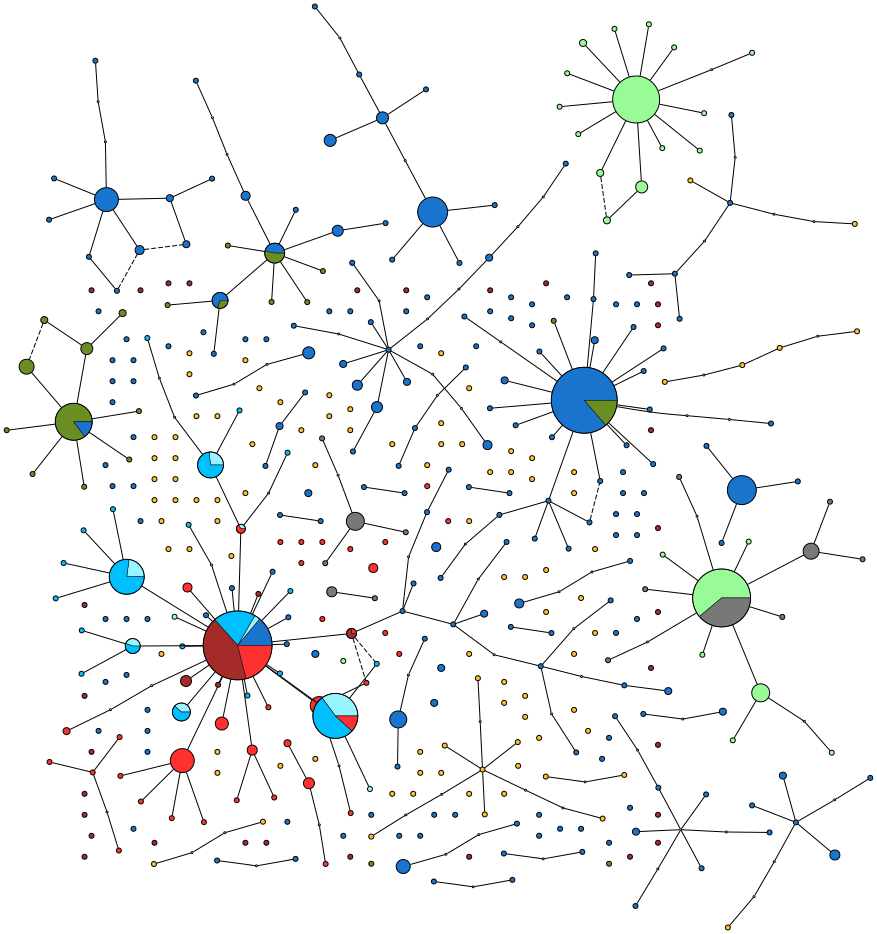

In [8]:
graph = hapclust.graph_haplotype_network(h_vgsc, network_method='mjn', hap_colors=hap_colors, max_dist= 3)
graph

In [9]:
pos = pos_phased_region[loc]
pos

0,1,2,3,4,...,1705,1706,1707,1708,1709
2358254,2358316,2358328,2358353,2358405,...,2431417,2431487,2431518,2431527,2431542


In [10]:
pos_995S = 2422651
pos_995F = 2422652

In [11]:
loc_995S = h_vgsc[pos.locate_key(pos_995S)] == 1
loc_995F = h_vgsc[pos.locate_key(pos_995F)] == 1

In [14]:
np.count_nonzero(loc_995F), np.count_nonzero(loc_995S)

(775, 430)

In [16]:
h_vgsc_995F = h_vgsc.compress(loc_995F, axis=1)
h_vgsc_995S = h_vgsc.compress(loc_995S, axis=1)

In [17]:
h_vgsc_995F

<HaplotypeArray shape=(1710, 775) dtype=int8>
0 0 0 0 0 ... 0 0 0 0 0
0 0 0 0 0 ... 0 0 0 0 0
0 0 0 0 0 ... 0 0 0 0 0
...
0 0 0 0 0 ... 0 0 0 0 0
0 0 0 0 0 ... 0 0 0 0 0
0 0 0 0 0 ... 0 0 0 0 0

In [18]:
h_vgsc_995S

<HaplotypeArray shape=(1710, 430) dtype=int8>
0 0 0 0 0 ... 0 0 0 0 0
0 0 0 0 0 ... 0 0 0 0 0
0 0 0 0 0 ... 0 0 0 0 0
...
0 0 0 0 0 ... 0 0 0 0 0
0 0 0 0 0 ... 0 0 0 0 0
0 0 0 0 0 ... 0 0 0 0 0

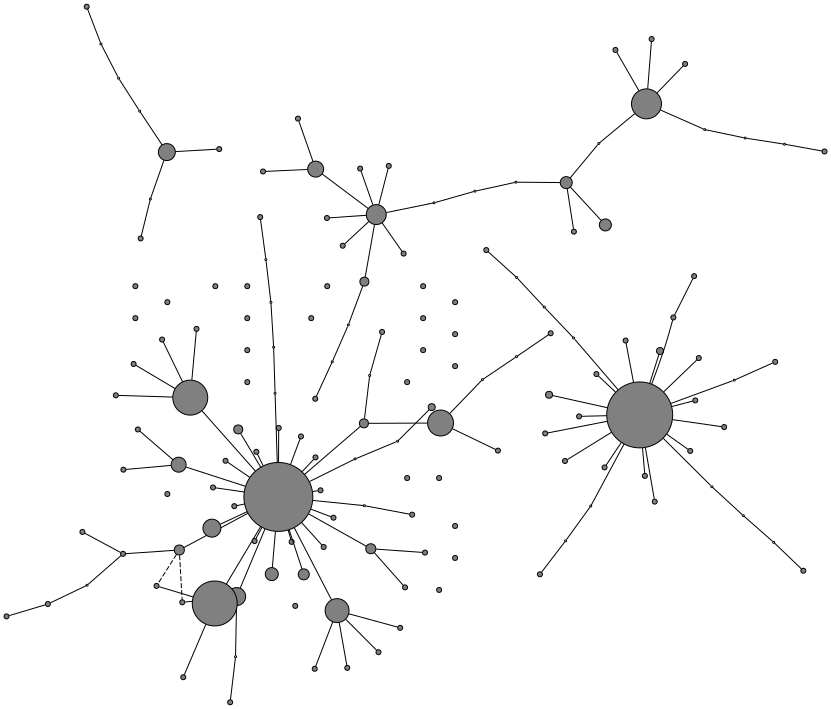

In [21]:
graph = hapclust.graph_haplotype_network(h_vgsc_995F)
graph

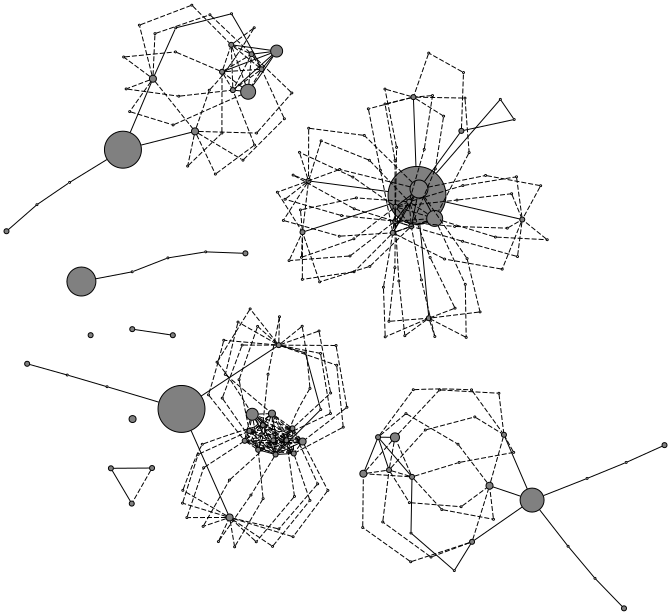

In [23]:
graph = hapclust.graph_haplotype_network(h_vgsc_995S, network_method='msn')
graph